In [100]:
#Importing Libraries

import random
import time
import numpy as np
import pandas as pd
from copy import deepcopy
from random import shuffle
import scipy.stats as sts
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

def distance(coord1, coord2):
    y1, x1 = coord1 #person
    y2, x2 = coord2 # door s
    # caluclate the manhattan distance (as opposed to Euclidean distance )
    return abs(x1-x2) + abs(y1-y2) 


class Person: 
    def __init__(self, current_position):
        self.nearest_door = None
        self.current_position = current_position
        self.direction = [] 

    def set_nearest_door(self, coordinates):
        self.nearest_door = coordinates         

    def compute_direction(self):
        y1, x1 = self.current_position
        y2, x2 = self.nearest_door

        #x1, y1 = self.current_position
        #x2, y2 = self.nearest_door

        self.direction = []
        
        if y1 < y2: 
            self.direction.append('down')
        elif y1 > y2:
            self.direction.append('top')
        elif y1 == y2:
            self.direction.append('stay')

#X IS CORRECT
        if x1 < x2:
            self.direction.append('right')
        elif x1 > x2:
          self.direction.append('left')
        elif x1 == x2:
          self.direction.append('stay')


In [101]:
class Grid:
    def __init__(self, size, density):
        self.grid = np.zeros((size,size))        
        self.size = size
        self.total_time = []
        self.doors = [(0,0), (size-1, size-1)]     
        self.density = density
        self.time_step = 0
        self.people = []
                 

        positioning_people = np.array([(x,y) for x in range(self.size) for y in range(self.size)]) # for multiple initiate_location
        initiate_location = np.random.choice(len(positioning_people), size=int(round(self.density * self.size)),
            replace=False)
        random_coordinates = positioning_people[initiate_location]

        
        for coordinate in random_coordinates:
            # nearest door calculation
            person = Person(coordinate)            
            # door is the coordinate 
            nearest_door = None
            d = 10000000000 
            smallest_d = d
            for door in self.doors:
                d = distance(person.current_position, door)
                if d < smallest_d:
                    smallest_d = d 
                    nearest_door = door 
                                              
            person.set_nearest_door(nearest_door)
            self.people.append(person)
            self.grid[coordinate[0]][coordinate[1]] = 1  
            
    
    def update(self, optimized=True):
        '''
        Advance one time step in the simulation.
        '''
        self.time_step += 1
        #print(f'time steps on the top {self.time_step}')
        new_state = self.grid.copy()
        

        for person in self.people:
          person.compute_direction()
                 
          #print(f'person at ({person.current_position[0]}, {person.current_position[1]}) wants to move {person.direction}')  
          for direction in person.direction:
            #print("Update printer")
            
            if direction == "top" and person.current_position[0] > 0 and self.grid[person.current_position[0]-1][person.current_position[1]] == 0:
              new_state[person.current_position[0]][person.current_position[1]] = 0  # This was a 1
              person.current_position[0] -= 1  # Update person's position
              new_state[person.current_position[0]][person.current_position[1]] = 1 # This was a 0
              #print("Update top")
                
            if direction == "down" and person.current_position[0] < self.size-1 and self.grid[person.current_position[0]+1][person.current_position[1]] == 0:
              new_state[person.current_position[0]][person.current_position[1]] = 0  # This was a 1
              person.current_position[0] += 1  # Update person's position
              new_state[person.current_position[0]][person.current_position[1]] = 1 # This was a 0
                              
              #print("Update down")
            if direction == "left" and person.current_position[1] > 0 and self.grid[person.current_position[0]][person.current_position[1]-1] == 0:
              new_state[person.current_position[0]][person.current_position[1]] = 0  # This was a 1
              person.current_position[1] -= 1
              new_state[person.current_position[0]][person.current_position[1]] = 1 # This was a 0

              #print("Update left")-
            if direction == "right" and person.current_position[1] < self.size-1 and self.grid[person.current_position[0]][person.current_position[1]+1] == 0:
                new_state[person.current_position[0]][person.current_position[1]] = 0  # This was a 1
                person.current_position[1] += 1 
                new_state[person.current_position[0]][person.current_position[1]] = 1  # This was a 1
                #update right

            self.grid = new_state
            
        self.exit_counter = 0
        self.timer = 0
        for person in self.people:
           if np.all(person.current_position == np.array([0,0])) == True: 
             self.grid[person.current_position[0]][person.current_position[1]] = 0 # take out people (how many?)
             if (self.grid[person.current_position[0]][person.current_position[1]] == 0) == True:
               self.exit_counter += 1

               #print(f'exit counter one {self.exit_counter}')

           if np.all(person.current_position == np.array([self.size - 1, self.size -1])) == True:
             self.grid[person.current_position[0]][person.current_position[1]] = 0
             if (self.grid[person.current_position[0]][person.current_position[1]] == 0) == True:
               self.exit_counter += 1
               #print(f'exit counter two {self.exit_counter}')
           
           if self.exit_counter < len(self.people):
             self.timer += 1
             #print(f'SELF TIMER DADO {self.timer}')


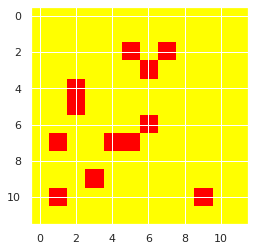

In [102]:
import matplotlib.animation as animation
from IPython.display import HTML
from IPython.display import clear_output


fig, ax = plt.subplots()
sim = Grid(size = 12, density= 1)
grid = sim.grid
im = ax.imshow(grid, cmap = plt.cm.autumn_r)
# WITHOUT CARS SHOWING THE TRAFFIC LIGHTS

In [103]:
def updatefig(x):
  
    sim.update()
    grid = sim.grid
    im.set_array(grid)
    return [im]

ani = animation.FuncAnimation(fig, updatefig, frames=60, interval=300)
HTML(ani.to_html5_video())

# ## EMPIRICAL ANALYSIS AND ATTEMPT AT SIMULATION

In [104]:
sizes = [10,11,12,13,14,15,16,17]
people_density = np.linspace(0, 2, 20)

trials = 50 # Number of times to repeat the simulation at each density
sim_flow_results = {}  # The results go here
conf_intt = []

for s in sizes:
    sim_flow_results[s] = []
    for den in people_density:
        flows = []
        for trial in range(trials):
            sim = Grid(size = s, density= den)
            # Run for 50 steps to reach an equilibrium state
            for step in range(50):
                sim.update()
            # Record the final average traffic flow
            flows.append(sim.timer)
        sim_flow_results[s].append(np.mean(flows))


        conf_int = np.quantile(flows, [0.05, 0.95])
        conf_intt.append(conf_int) 

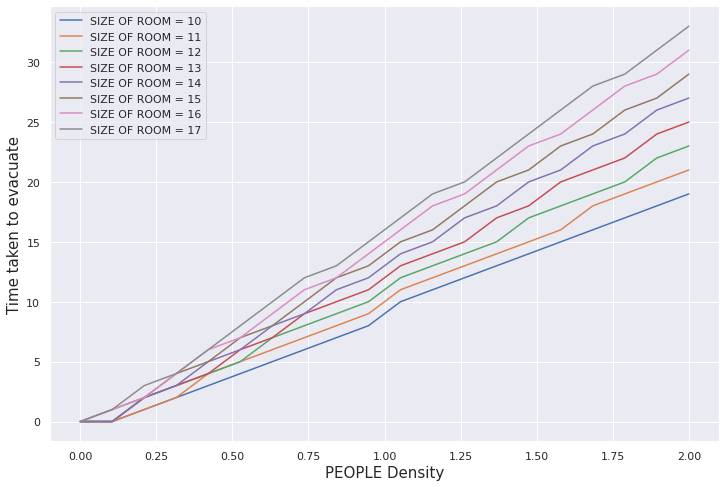

In [105]:
plt.figure(figsize=(12, 8))
for p, flow in sim_flow_results.items():
    plt.plot(people_density, flow, label=f'SIZE OF ROOM = {p}')
plt.xlabel("PEOPLE Density", size = 15)
plt.ylabel("Time taken to evacuate", size = 15)
plt.legend()
plt.show()

#xlabel = car density
#ylabel = flow rate


In [106]:
time_taken = []
for i in range(len(conf_intt)):
  time_taken.append(np.mean(conf_intt[i]))

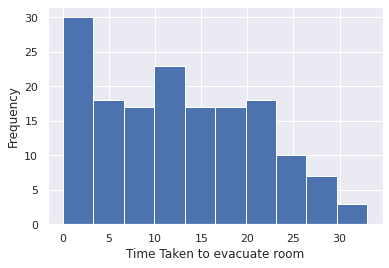

In [107]:
import matplotlib.pyplot as plt
plt.hist(time_taken)
plt.xlabel("Time Taken to evacuate room")
plt.ylabel("Frequency")
plt.show()
# IRRESPECTIVE OF SIZE
# TIME TAKEN TO EVACUATE ROOM

In [108]:
print("Confidence Interval for Average Time taken to evacuate:", np.quantile(time_taken, [0.05, 0.95]))

Confidence Interval for Average Time taken to evacuate: [ 0.   27.05]


In [109]:
print("Standard deviation:", np.std(time_taken))

Standard deviation: 8.578898530697282


In [110]:
print("Mean:", np.mean((time_taken)))


Mean: 12.55
